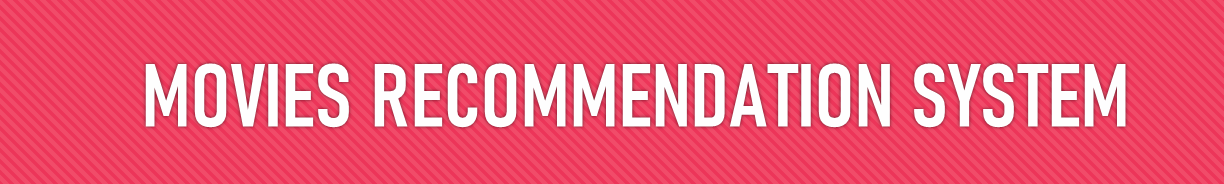

# Movie Recommendation Systems 

Movies Recommendation Systems can be of two types
- Content based
- Collaborative

**Content-Based Filtering:**
This filtration strategy is based on the data provided about the items. The algorithm recommends products that are similar to the ones that a user has liked in the past. This similarity (generally cosine similarity) is computed from the data we have about the items as well as the user’s past preferences.
For example, if a user likes movies such as ‘The Prestige’ then we can recommend him the movies of ‘Christian Bale’ or movies with the genre ‘Thriller’ or maybe even movies directed by ‘Christopher Nolan’.So what happens here the recommendation system checks the past preferences of the user and find the film “The Prestige”, then tries to find similar movies to that using the information available in the database such as the lead actors, the director, genre of the film, production house, etc and based on this information find movies similar to “The Prestige”.



**Collaborative Filtering:**
This filtration strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm. The main difference between content-based filtering and collaborative filtering that in the latter, the interaction of all users with the items influences the recommendation algorithm while for content-based filtering only the concerned user’s data is taken into account.
There are multiple ways to implement collaborative filtering but the main concept to be grasped is that in collaborative filtering multiple user’s data influences the outcome of the recommendation. and doesn’t depend on only one user’s data for modeling.




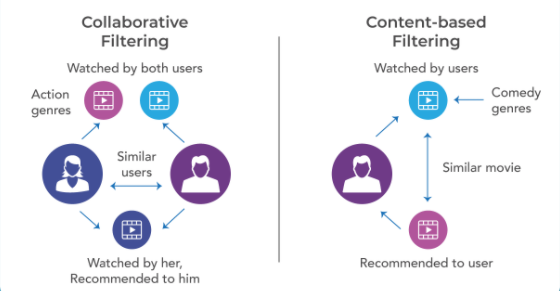

**In this project we will be implementing Content based movie recommender. We will be making tags based on Genre, Cast, Director and storyline and then we will calculate similarity score based on tags using CosineSimilarity to make our recommendations based on the movie entered by user.**

##  Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [2]:
# Reading Data
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
# Merging movies and credits dataframe on title and storing in another dataframe
df = movies.merge(credits , on='title')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

There are 4809 movies in this dataset

Features which can be used for making recommendations:

    - Budget
    - Genres
    - Keywords
    - Original Language
    - Overview 
    - Popularity
    - Production Company
    - Production countries
    - Release data
    - Revenue
    - Vote Average
    - Vote Count
    - Cast
    - Crew

In [8]:
''' For this project
    We will be making a tags feature which we will use to make our model, 
    for this we will only take features with text like genres, overview, cast, crew'''

# Selecting the features we want to use for our recommender system

# genres
# id
# keywords
# title
# overview
# cast
# crew

df = df[['id','genres','keywords','title','overview','cast','crew']]


In [9]:
df.head(2)

,id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
# Checking for NULL Values
df.isnull().sum()

id          0
genres      0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [11]:
# Checking for Duplicated samples
df.duplicated().sum()

0

## Data Cleaning

In [12]:
# Dropping NULL Values
# There are only 3 Null samples out of 4809 so we can simply drop them
df.dropna(inplace=True)

In [13]:
df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

'
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
'

We have to extract genres from the list of dictionaries above
 It should be like : ['Action', 'Adventure', 'Fantasy', 'Science Fiction']



In [14]:
import ast # To convert the sting of list to list

def get_features(lst):
    feat = []
    for i in ast.literal_eval(lst):
        feat.append(i['name'])
    return feat


In [15]:
# Genres column after cleaning
df['genres'].apply(get_features)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

As you can see with the get_features function we have successfully extracted genres

Now we will apply the same to keywords column also and store them back in our dataframe

In [16]:
# Extracting genres and keywords from data and saving back in dataframe

df['genres'] = df['genres'].apply(get_features)
df['keywords'] = df['keywords'].apply(get_features)
df.head(2)


,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [17]:
# Function to extract top 4 cast names
def get_cast(str):
    cast = []
    flag = 0
    for i in ast.literal_eval(str):
        if flag<4:
            cast.append(i['name'])
        flag = flag + 1
    return cast

In [18]:
df['cast'] = df['cast'].apply(get_cast)
df.head(2)

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [19]:
# Function to extract director name
def get_director(str):
    director = []
    for i in ast.literal_eval(str):
        if i['job'] == 'Director':
            director.append(i['name'])
    return director

In [20]:
df['crew'] = df['crew'].apply(get_director)
df.head(2)


,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]


In [21]:
'''There are spaces between elements of features,
    like space between first name and last name of cast which can result in model taking them as different elements,
    for that we have to remove space between them'''

# Function to remove space between elements
def remove_space(feature):
    new_feat = []
    for i in feature:
        new_feat.append(i.replace(" ",""))
    return new_feat

In [22]:
df['cast'] = df['cast'].apply(remove_space)
df['crew'] = df['crew'].apply(remove_space)
df['genres'] = df['genres'].apply(remove_space)
df['keywords'] = df['keywords'].apply(remove_space)
df.head(2)

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]


In [23]:
df['overview'].iloc[0]


'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [24]:
# Converting overview into list also
df['overview'] = df['overview'].apply(lambda x:x.split())

# Making a new column 'tags' which is made by combining all features
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']


In [25]:
df.head(2)

,id,genres,keywords,title,overview,cast,crew,tags
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


In [26]:
# Making a final dataframe which will be used to train our model
final_dataset = df[['id','title','tags']]

In [27]:
final_dataset.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [28]:
final_dataset['tags'] = final_dataset['tags'].apply(lambda x: " ".join(x))
final_dataset.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [29]:
# Converting all the tags to lowercase
final_dataset['tags'] = final_dataset['tags'].apply(lambda x : x.lower())

**We also have to do stemming of the tags.
Stemming is basically removing the suffix from a word and reduce it to its root word.
The main aim is to reduce the inflectional forms of each word into a common base word or root word or stem word.**

In [30]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stemming(text):
    stemmed_output = []
    for i in text.split():
        stemmed_output.append(stemmer.stem(i))
    string = " ".join(stemmed_output)
    return string

In [31]:
final_dataset['tags'] = final_dataset['tags'].apply(stemming)

In [32]:
final_dataset.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


## Training Model

- For training model we first have to vectorize our tags which are in text format.
- Then we will use CosineSimillarity to find similar vectors so that we make make recommendation
- We will use 2 vectorization techniques(CountVectorizer, TfidfVectorizer) and compare the results from them

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000,stop_words='english')

In [34]:
cv_vector = cv.fit_transform(final_dataset['tags']).toarray()

In [35]:
cv_vector.shape

(4806, 7000)

### Cosine Similarity
**To Find the similarity between movies, we using use cosine_similarity**

**The cosine similarity helps overcome this fundamental flaw in the ‘count-thecommon-words’ or Euclidean distance approach. Mathematically, it measures
the cosine of the angle between two vectors projected in a multi-dimensional
space.**

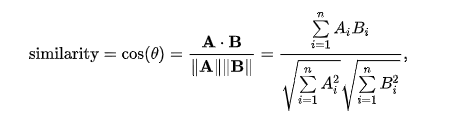

**The cosine similarity is described mathematically as the division between the
dot product of vectors and the product of the euclidean norms or magnitude of
each vector**

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
cv_similarity_matrix = cosine_similarity(cv_vector)

In [37]:
cv_similarity_matrix.shape

(4806, 4806)

cv_similarity_matrix is 4806 x 4806 matrix,

in which (i,j)th element is the similarity between i'th movie and j'th movie

In [38]:
cv_similarity_matrix

array([[1.        , 0.07435224, 0.07756315, ..., 0.04141577, 0.        ,
        0.        ],
       [0.07435224, 1.        , 0.05638839, ..., 0.02258194, 0.        ,
        0.02450715],
       [0.07756315, 0.05638839, 1.        , ..., 0.02355714, 0.        ,
        0.        ],
       ...,
       [0.04141577, 0.02258194, 0.02355714, ..., 1.        , 0.03809697,
        0.04095301],
       [0.        , 0.        , 0.        , ..., 0.03809697, 1.        ,
        0.08268982],
       [0.        , 0.02450715, 0.        , ..., 0.04095301, 0.08268982,
        1.        ]])

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf=TfidfVectorizer(stop_words="english",max_features=7000)
tf_vector= tf.fit_transform(final_dataset['tags']).toarray()
tf_similarity_matrix = cosine_similarity(tf_vector)

In [40]:
def recommend(movie,vectorizer='tfidf'):
    
    index = final_dataset[final_dataset['title'] == movie].index[0]
    
    if(vectorizer=='tfidf'):
        similarity_score = sorted(list(enumerate(tf_similarity_matrix[index])),reverse=True,key = lambda x: x[1])
        
    elif(vectorizer=='cv'):
        similarity_score = sorted(list(enumerate(cv_similarity_matrix[index])),reverse=True,key = lambda x: x[1])
        
    elif(vectorizer=='hv'):
        similarity_score = sorted(list(enumerate(hv_similarity_matrix[index])),reverse=True,key = lambda x: x[1])
        
    for i in similarity_score[1:6]:
        print(final_dataset.iloc[i[0]].title)

## Predictions

Predictions if **TfidfVectorizer** is  used for vectorization

In [41]:
recommend('The Avengers','tfidf')

Avengers: Age of Ultron
Captain America: Civil War
X-Men: Apocalypse
Iron Man 3
Thor: The Dark World


Predictions if **CountVectorizer** is  used for vectorization

In [42]:
recommend('The Avengers','cv')

Avengers: Age of Ultron
Iron Man 3
Captain America: Civil War
Captain America: The First Avenger
Iron Man


## Conclustion
**The predictions with different vectorization techniques is obtained. To check
which recommendations are better we can deploy this model and check for
metrics like Customer Lifetime Value (CLTV), Click-Through Rate (CTR).**